In [3]:
#Data processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#Model performance metrics
from time import process_time
from memory_profiler import profile
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Feature selection and models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [4]:
%load_ext memory_profiler

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
#Additional Metrics
from sklearn.metrics import brier_score_loss
from sklearn.metrics import matthews_corrcoef

In [6]:
#https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("online_shoppers_intention.csv")

In [7]:
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
df_onehot = pd.get_dummies(df, columns = categorical_features, prefix = categorical_features)

#Tranform categorical attributes
label_encoder = LabelEncoder()
df_onehot['Revenue'] = label_encoder.fit_transform(df['Revenue'])

X = df_onehot.drop("Revenue", axis = 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
#Random Forest function
def RFClassifierMOD(X_train, y_train, X_test, y_test, numeric_attributes, cat_attributes, num_estimators):
  #Initialize the DecisionTreeClassifier
  forest_raw_imbalanced = RandomForestClassifier(n_estimators = num_estimators)

  #Time Measurement
  start_time = process_time()
  
  #Data preprocessing
  smote = SMOTE()
  X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
  if not numeric_attributes:
    X_train_combined = X_train_smote
    X_test_combined = X_test
  else:
      # Subset the numeric attributes
      X_train_smote_numeric = X_train_smote[numeric_attributes]
      X_test_numeric = X_test[numeric_attributes]

      scaler = StandardScaler()
      X_train_smote_S = scaler.fit_transform(X_train_smote_numeric)
      X_test_numeric_S = scaler.transform(X_test_numeric)

      # Concatenate the standardized numeric attributes with the categorical attributes
      X_train_combined = np.concatenate((X_train_smote_S, X_train_smote[cat_attributes]), axis=1)
      X_test_combined = np.concatenate((X_test_numeric_S, X_test[cat_attributes]), axis=1)

  #Fit the Classifier to the data
  forest_raw_imbalanced.fit(X_train_combined, y_train_smote)

  #Predict new Data
  y_pred = forest_raw_imbalanced.predict(X_test_combined)

  #Time Measurement
  end_time = process_time()

  #Results
  cr = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  time = end_time - start_time
  print(cr)
  print(cm)
  mcc = matthews_corrcoef(y_test, y_pred)
  brier_score = brier_score_loss(y_test, y_pred)
  print("Matthew's Correlation", mcc)
  print("Brier's Score", brier_score)
  print(time)

In [43]:
# Specify the number of principal components you want to retain
n_components = 75 # Adjust the number as per your requirement

# Create the PCA object
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
X_pca = pca.fit_transform(X_scaled)
total_variance = np.sum(np.var(X, axis=0))

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

# Print the total variance and explained variance ratios
print("Total Variance:", total_variance)
print("Explained Variance Ratios:", explained_variance_ratios)
print("Cumulative Explained Variance:", cumulative_explained_variance)


Total Variance: 3715229.752319461
Explained Variance Ratios: [4.93743415e-02 4.24002328e-02 3.93401570e-02 3.31645476e-02
 2.87317277e-02 2.72295854e-02 2.59190286e-02 2.41360318e-02
 2.02706674e-02 1.94823016e-02 1.91344684e-02 1.80013563e-02
 1.71165058e-02 1.70257771e-02 1.59270109e-02 1.56350599e-02
 1.55586156e-02 1.52678617e-02 1.50179037e-02 1.49846309e-02
 1.46690340e-02 1.45855058e-02 1.44815719e-02 1.43792319e-02
 1.42911538e-02 1.41402952e-02 1.40176686e-02 1.39377293e-02
 1.38384635e-02 1.37869885e-02 1.37160888e-02 1.36332318e-02
 1.34708466e-02 1.34477700e-02 1.33995806e-02 1.33335473e-02
 1.33012375e-02 1.32361709e-02 1.31532717e-02 1.31275903e-02
 1.31078968e-02 1.30306966e-02 1.29761804e-02 1.28683009e-02
 1.27791776e-02 1.27622664e-02 1.26752159e-02 1.26446116e-02
 1.23341296e-02 1.21454117e-02 1.20910886e-02 1.18605607e-02
 1.12986807e-02 1.11242619e-02 1.05771891e-02 9.91464174e-03
 9.82777882e-03 9.19716091e-03 8.52575138e-03 6.54470886e-03
 5.53814504e-03 4.680017

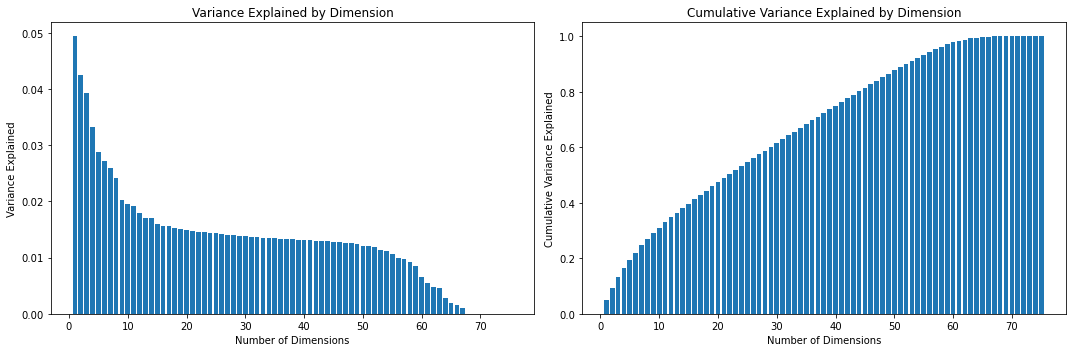

In [36]:
bar_titles = list(range(1, 76))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].bar(bar_titles, explained_variance_ratios)
axes[0].set_xlabel('Number of Dimensions')
axes[0].set_ylabel('Variance Explained')
axes[0].set_title('Variance Explained by Dimension')

axes[1].bar(bar_titles, cumulative_explained_variance)
axes[1].set_xlabel('Number of Dimensions')
axes[1].set_ylabel('Cumulative Variance Explained')
axes[1].set_title('Cumulative Variance Explained by Dimension')

plt.tight_layout() 
plt.show()

In [44]:
X_pca_df = pd.DataFrame(X_pca)
pca_features = X_pca_df.columns.tolist()
y_pca_df = df_onehot['Revenue']
X_pca_df_train, X_pca_df_test, y_pca_df_train, y_pca_df_test = train_test_split(X_pca_df, y_pca_df, test_size = 0.3)
numeric_features = []

In [45]:
%memit RFClassifierMOD(X_pca_df_train, y_pca_df_train, X_pca_df_test, y_pca_df_test, numeric_features, pca_features, 100)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      3113
           1       0.59      0.49      0.53       586

    accuracy                           0.87      3699
   macro avg       0.75      0.71      0.73      3699
weighted avg       0.86      0.87      0.86      3699

[[2915  198]
 [ 300  286]]
Matthew's Correlation 0.45957046737671625
Brier's Score 0.13463098134630982
10.109375
peak memory: 260.63 MiB, increment: 32.34 MiB


In [47]:
#Correlation of Onehot encoded dataset

corr = df_onehot.corr()

revenue_correlation = corr["Revenue"]
sorted_pearson_correlation = revenue_correlation.abs().sort_values(ascending = False)

sorted_pearson_correlation_df = pd.DataFrame(sorted_pearson_correlation)
SPC_topquantile = sorted_pearson_correlation_df.quantile(0.75)
filtered_df = sorted_pearson_correlation_df[sorted_pearson_correlation_df >= SPC_topquantile]
filtered_df.dropna(inplace = True)
#18 attributes were kept, were in the top quantile
     
df_pearson = df_onehot[filtered_df.index.tolist()]

#Tranform categorical attributes
label_encoder = LabelEncoder()
df_pearson['Revenue'] = label_encoder.fit_transform(df_pearson['Revenue'])


C:\Users\david\AppData\Local\Temp/ipykernel_18152/797975208.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pearson['Revenue'] = label_encoder.fit_transform(df_pearson['Revenue'])


In [52]:
excluded_df = sorted_pearson_correlation_df[sorted_pearson_correlation_df < SPC_topquantile]
excluded_df.dropna(inplace = True)
excluded_df_pearson = df_onehot[excluded_df.index.tolist()]

In [56]:
# Specify the number of principal components you want to retain
n_components = 57 # Adjust the number as per your requirement

# Create the PCA object
pca = PCA(n_components=n_components)

ep_X_scaled = scaler.fit_transform(excluded_df_pearson)
# Fit the PCA model to the scaled data
ep_X_pca = pca.fit_transform(ep_X_scaled)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

# Print the total variance and explained variance ratios
print("Total Variance:", total_variance)
print("Explained Variance Ratios:", explained_variance_ratios)
print("Cumulative Explained Variance:", cumulative_explained_variance)


Total Variance: 3715229.752319461
Explained Variance Ratios: [5.30043912e-02 5.07150278e-02 3.57247042e-02 3.51380151e-02
 2.60331374e-02 2.56038019e-02 2.47802480e-02 2.24383494e-02
 2.17064931e-02 2.07574219e-02 2.03293471e-02 2.00020894e-02
 1.98903455e-02 1.97229971e-02 1.91987783e-02 1.90936772e-02
 1.89007924e-02 1.87813493e-02 1.86267590e-02 1.85442774e-02
 1.84547529e-02 1.83070548e-02 1.81831264e-02 1.80722124e-02
 1.79520667e-02 1.78471222e-02 1.77234944e-02 1.76543009e-02
 1.75573304e-02 1.75381187e-02 1.75106396e-02 1.74718054e-02
 1.74192766e-02 1.72318486e-02 1.71521911e-02 1.71284985e-02
 1.71009274e-02 1.69110882e-02 1.68412813e-02 1.66899940e-02
 1.65923219e-02 1.63952279e-02 1.59646841e-02 1.49475398e-02
 1.39911845e-02 1.30452073e-02 1.16903252e-02 9.78762435e-03
 8.95607253e-03 7.40920087e-03 6.01646557e-03 3.58555015e-03
 1.87946282e-03 1.45490950e-30 3.12231268e-31 6.99289029e-34
 3.24032356e-34]
Cumulative Explained Variance: [0.05300439 0.10371942 0.13944412 0.1

In [60]:
#Specify independent/ dependent values
X_p = df_pearson.drop(columns = "Revenue")
y_p = df_pearson["Revenue"]

result_df = pd.concat([X_p, pd.DataFrame(ep_X_pca)], axis=1)
result_df

,PageValues,ExitRates,ProductRelated,Month_Nov,ProductRelated_Duration,BounceRates,Administrative,TrafficType_2,VisitorType_New_Visitor,VisitorType_Returning_Visitor,...,47,48,49,50,51,52,53,54,55,56
0,0.000000,0.200000,1,0,0.000000,0.200000,0,0,0,1,...,-1.102862,0.098705,-0.072159,-0.026758,-0.034402,0.014894,-2.486633e-13,6.488250e-14,3.512219e-15,-2.724110e-17
1,0.000000,0.100000,2,0,64.000000,0.000000,0,1,0,1,...,0.160206,0.778871,-0.484717,-0.077834,0.000514,-0.019523,4.494834e-14,-1.211788e-14,1.455655e-14,1.273983e-16
2,0.000000,0.200000,1,0,0.000000,0.200000,0,0,0,1,...,0.046332,0.743902,-0.541054,0.060366,-0.350282,0.586096,9.197747e-13,-3.596103e-15,-4.874508e-17,-1.256871e-16
3,0.000000,0.140000,2,0,2.666667,0.050000,0,0,0,1,...,-1.020747,0.931498,1.196304,0.154233,-0.014075,0.247427,-1.619635e-13,-4.301377e-14,-4.606966e-17,-1.411370e-16
4,0.000000,0.050000,10,0,627.500000,0.020000,0,0,0,1,...,-0.609360,0.902348,-0.597495,-0.001659,-0.080398,-0.098727,-1.243350e-13,-8.377366e-14,-7.600957e-16,-6.498619e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,12.241717,0.029031,53,0,1783.791667,0.007143,3,0,0,1,...,-0.345690,0.386325,0.818937,0.270568,0.094783,-1.118995,-6.619135e-17,1.714652e-17,8.505824e-17,-4.922707e-17
12326,0.000000,0.021333,5,1,465.750000,0.000000,0,0,0,1,...,-0.371670,-0.856151,0.903566,0.162578,0.137873,0.327352,3.814765e-16,8.192004e-16,-8.794179e-17,2.166964e-17
12327,0.000000,0.086667,6,1,184.250000,0.083333,0,0,0,1,...,0.756865,-0.519963,0.965438,0.191538,0.133058,0.229135,3.268683e-16,4.362805e-16,-1.096916e-16,-9.638172e-19
12328,0.000000,0.021053,15,1,346.000000,0.000000,4,0,0,1,...,-1.784557,0.036909,-0.694495,-0.197174,-0.029577,-0.035044,-1.321710e-16,4.399867e-16,-1.175663e-16,1.016089e-18


In [64]:
#Split the Data
result_df.columns = result_df.columns.astype(str)
HX_p_train, HX_p_test, Hy_p_train, Hy_p_test = train_test_split(result_df, y_p, test_size = 0.3)


In [65]:
%memit RFClassifierMOD(HX_p_train, Hy_p_train, HX_p_test, Hy_p_test, numeric_features, pca_features, 100)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3137
           1       0.66      0.60      0.63       562

    accuracy                           0.89      3699
   macro avg       0.79      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699

[[2961  176]
 [ 225  337]]
Matthew's Correlation 0.5645143874418733
Brier's Score 0.10840767775074345
7.75
peak memory: 299.48 MiB, increment: 28.21 MiB
